In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [55]:
%pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 8.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
nba_player_stats = pd.read_csv("all_players_stats.csv")
for col in nba_player_stats.columns:
    print(col)

Unnamed: 0
Season
AGE
TM
LG
POS
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
ID
MP_total
FG_36
FGA_36
FG%_36
3P_36
3PA_36
3P%_36
2P_36
2PA_36
2P%_36
FT_36
FTA_36
FT%_36
ORB_36
DRB_36
TRB_36
AST_36
STL_36
BLK_36
TOV_36
PF_36
PTS_36
FG_100
FGA_100
FG%_100
3P_100
3PA_100
3P%_100
2P_100
2PA_100
2P%_100
FT_100
FTA_100
FT%_100
ORB_100
DRB_100
TRB_100
AST_100
STL_100
BLK_100
TOV_100
PF_100
PTS_100
ORtg
DRtg
PER
TS%
3PAr
FTr
ORB%
DRB%%
TRB%
AST%
STL%%
BLK%
TOV%
USG%
OWS
DWS
WS
WS/48
OBPM
DBPM
BPM
VORP
teamPPG
oppPPG
SRS
pace
teamOFRtg
teamDFRtg


In [47]:
nba_player_stats.drop("Unnamed: 0", axis="columns")
# Define a function to shift values for a specific player
def shift_player_points(group):
    group['next_year_ast'] = group['PTS'].shift(-1)
    return group

# Apply the shifting function within each player group
df_shifted = nba_player_stats.groupby('ID').apply(shift_player_points).copy()

In [ ]:
df_shifted[['StartYear', 'EndYear']] = df_shifted['Season'].str.split('-', expand=True).copy()
df_shifted['StartYear'] = pd.to_datetime(df_shifted['StartYear'], format='%Y').copy()
df_sorted  = df_shifted.sort_values(by='StartYear')
df_sorted

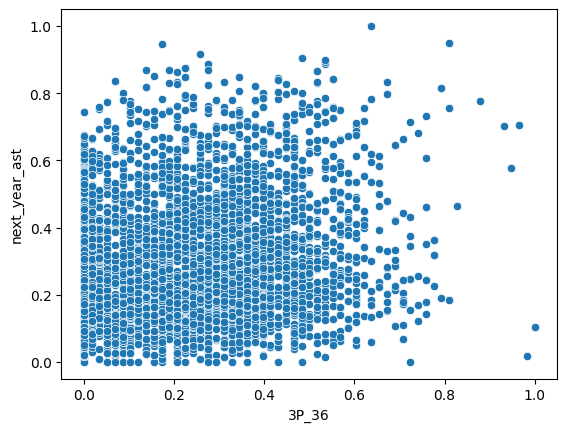

In [66]:
numeric_columns = df_sorted.select_dtypes(include=['float64', 'int64']).columns

# Assuming 'df' is your DataFrame
scaler = MinMaxScaler()
df_sorted[numeric_columns] = scaler.fit_transform(df_sorted[numeric_columns]).copy()

sns.scatterplot(x='3P_36', y='next_year_ast', data=df_sorted)
plt.show()

next_year_ast    1.000000
PTS              0.856756
FG               0.842073
FGA              0.835962
FT               0.789052
FTA              0.771546
2PA              0.764679
2P               0.762891
TOV              0.724147
PTS_36           0.715751
PTS_100          0.715219
MP               0.708743
USG%             0.675370
VORP             0.670073
FGA_36           0.640528
WS               0.640267
FG_36            0.638540
FT_36            0.637971
FG_100           0.633277
FGA_100          0.631687
FT_100           0.628271
OBPM             0.627655
OWS              0.624755
MP_total         0.618515
GS               0.575094
FTA_36           0.574365
PER              0.574225
FTA_100          0.561502
AST              0.556150
BPM              0.536702
STL              0.529282
DRB              0.521931
DWS              0.491684
2PA_36           0.488298
2P_36            0.471303
2PA_100          0.468311
3PA              0.468263
2P_100           0.458848
3P          

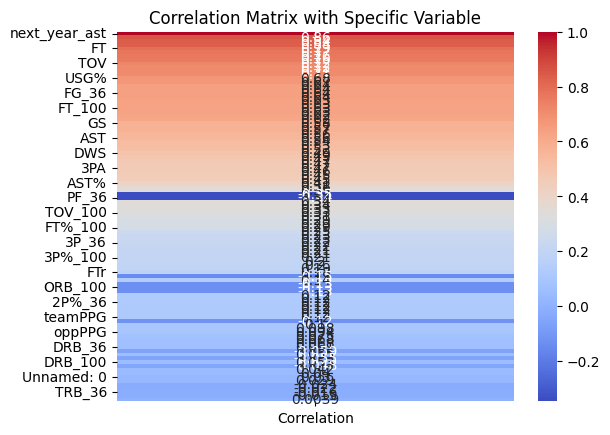

In [50]:
numeric_columns = df_sorted.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for the specific variable and all other variables
correlation_matrix = df_sorted[numeric_columns].corrwith(df_sorted['next_year_ast'])

sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)

pd.set_option('display.max_rows', None)

# Display the correlation matrix
print(sorted_correlation)

# Create a heatmap for visualization
sns.heatmap(pd.DataFrame(correlation_matrix[sorted_correlation.index], columns=['Correlation']), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Specific Variable')
plt.show()